<a href="https://colab.research.google.com/github/Yuyan-C/MAIS202Project/blob/main/Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data Preprocessing**
Use first 371848 records for training, next 92962 records for validation, and last 116202 records for testing.

Normalize the data using min-max scalar.




In [2]:
df = pd.read_csv('covtype.csv')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
#scaler.fit_transform(df)

In [3]:
# set the number of training set, validation set, and testing set
num_train, num_valid, num_test = 371848, 92962, 116202
# get the number of features 
num_features = len(df.columns)-1
# set X_train, X_valid, and X_test
X_train = scaler.fit_transform(df.iloc[:num_train, :num_features])
X_valid = scaler.fit_transform(df.iloc[num_train: num_train+num_valid, :num_features])
X_test = scaler.fit_transform(df.iloc[num_train+num_valid:, :num_features])
# set y_train, y_valid, and y_test
y_train = df.iloc[:num_train, num_features:].to_numpy().reshape(num_train)
y_valid = df.iloc[num_train: num_train+num_valid, num_features:].to_numpy().reshape(num_valid)
y_test = df.iloc[num_train+num_valid:, num_features:].to_numpy().reshape(num_test)

# Support Vector Machine


In [5]:
 from sklearn.svm import LinearSVC

In [6]:
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
clf.score(X_train, y_train)

0.737777263828231

In [ ]:
clf.score(X_valid, y_valid)

0.5799789161162625

Changing Cs


In [ ]:
#cs = [0.1, 1, 10, 100, 1000]
#train_scores = []
#valid_scores = []
#for c in cs:
 # clf = LinearSVC(C = c)
  #clf.fit(X_train, y_train)
  #clf.score(X_train, y_train)
  #clf.score(X_valid, y_valid)

#plt.plot(cs, train_scores)
#plt.plot(cs, valid_scores)
#plt.show()


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
train_scores = []
valid_scores = []
clf = LinearSVC(C = 0.1)
clf.fit(X_train, y_train)
#c1_t = clf.score(X_train, y_train)
#c1_v = clf.score(X_valid, y_valid)
train_scores.append(clf.score(X_train, y_train))
valid_scores.append(clf.score(X_valid, y_valid))

In [ ]:
clf = LinearSVC(C = 1)
clf.fit(X_train, y_train)
train_scores.append(clf.score(X_train, y_train))
valid_scores.append(clf.score(X_valid, y_valid))

In [ ]:
clf = LinearSVC(C = 10)
clf.fit(X_train, y_train)
train_scores.append(clf.score(X_train, y_train))
valid_scores.append(clf.score(X_valid, y_valid))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
clf = LinearSVC(C = 0.001)
clf.fit(X_train, y_train)
train_scores.append(clf.score(X_train, y_train))
valid_scores.append(clf.score(X_valid, y_valid))

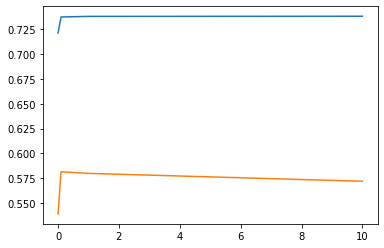

[0.7210526881951765, 0.7372071384006368, 0.737777263828231, 0.7379305522686689]
[0.5392310836685957, 0.5816139928142682, 0.5799789161162625, 0.5720617026311826]


In [ ]:
cs = [0.001,0.1, 1, 10]
train_scores = [ 0.7210526881951765,0.7372071384006368, 0.737777263828231, 0.7379305522686689]
valid_scores = [0.5392310836685957, 0.5816139928142682, 0.5799789161162625, 0.5720617026311826]
plt.plot(cs, train_scores)
plt.plot(cs,valid_scores)
plt.show()
print(train_scores)
print(valid_scores)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# KNN


In [4]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
print(neigh.score(X_train, y_train))
print(neigh.score(X_valid, y_valid))

0.9592252748434844
0.5983627718852864
